<h1>Exploration of Auto MPG</h1>

In [2]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


cars_names = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','model year','origin','car name']

cars = pd.read_table("auto-mpg.data.txt", delim_whitespace=True, names = cars_names)

In [3]:
#Size of the Dataset
cars.shape

(398, 9)

In [4]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
#horsepower have to be numeric
#horsepower have 6 rows with the value '?'
#drop this rows and 

cars = cars[cars['horsepower'] != '?' ]
cars['horsepower'] = cars['horsepower'].astype('float32')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469391,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491139,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
import seaborn as sns

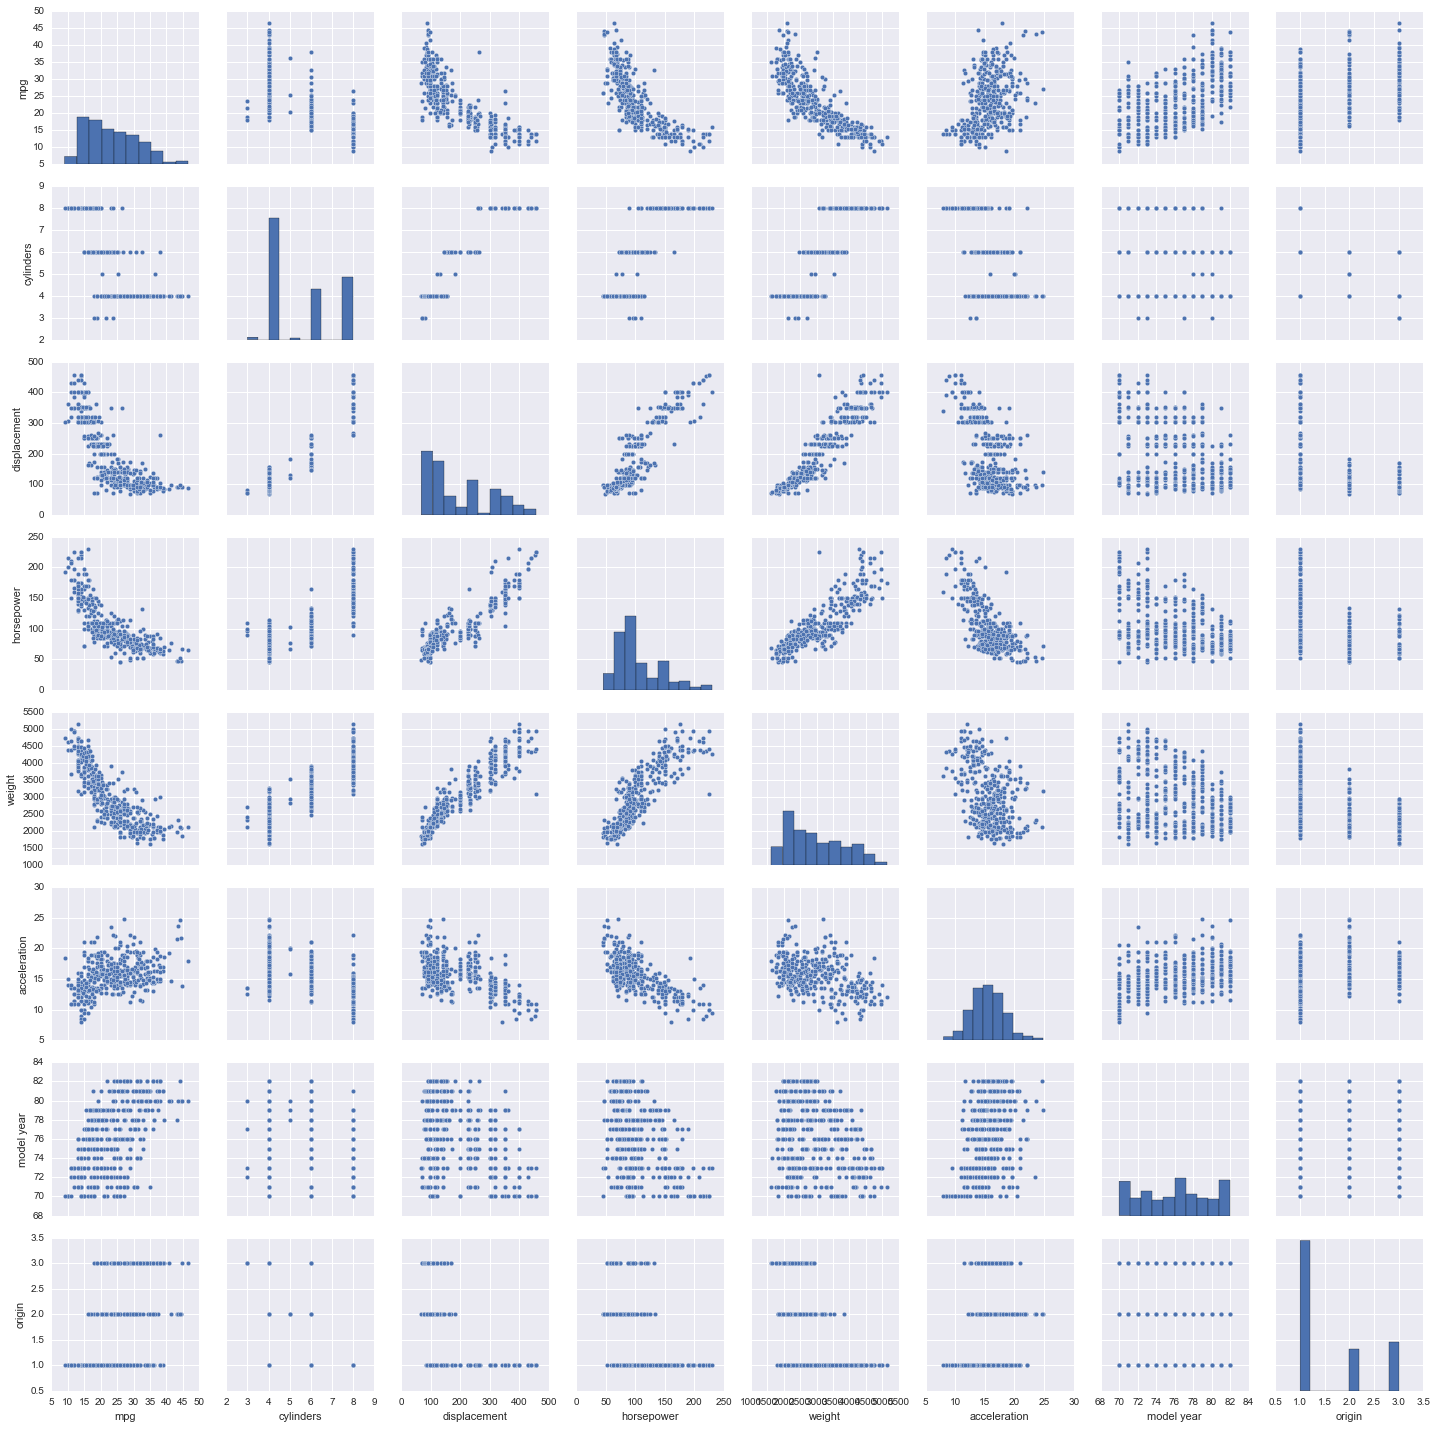

In [62]:
cars = cars[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]

#for i in c:
#    cars[i].hist()
#    plt.xlabel(i)
#    plt.show()

sns.pairplot(cars)

<h2>Linear Regression</h2>

In [90]:
c = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']
limit = int(3*cars.shape[0]/4)
X_train = cars.iloc[:limit,1:]
y_train = cars.iloc[:limit,0]
X_test = cars.iloc[limit:,1:]
y_test = cars.iloc[limit:,0]


lr = LinearRegression()

#Remember the [[]], is the data in 1 column
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

#mean_squared_error
mse = mean_squared_error(y_test, predictions)

# The coefficients
print('Coefficients: ', lr.coef_)
# The mean square error
print("Residual sum of squares: %.2f" % mse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Coefficients:  [-0.37174183  0.00772274 -0.01645356 -0.00536526 -0.07201915  0.41660343
  0.91874674]
Residual sum of squares: 35.47
Variance score: -0.03


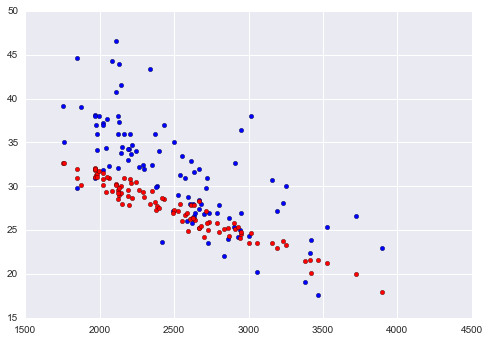

In [91]:
plt.scatter(X_test["weight"], y_test, c='b')
plt.scatter(X_test["weight"], prediction, c='r')


plt.show()

<p>The variance score is very low due to we use all the features.</p>
<p>For a better solution we aplied a feature selection. </p>
<p>From the pair graph, we can see that the features 'cylinders', 'model year' and 'origin' dont'show a clear correlation with the 'mpg' variable, so those are rejected.</p>

In [104]:
c = ['mpg','horsepower', "weight",'acceleration']
limit = int(3*cars.shape[0]/4)
X_train = cars[c].iloc[:limit,1:]
y_train = cars.iloc[:limit,0]
X_test = cars[c].iloc[limit:,1:]
y_test = cars.iloc[limit:,0]

lr2 = LinearRegression()

#Remember the [[]], is the data in 1 column
lr2.fit(X_train, y_train)
predictions = lr2.predict(X_test)

#mean_squared_error
mse = mean_squared_error(y_test, predictions)

# The coefficients
print('Coefficients: ', lr2.coef_)
# The mean square error
print("Residual sum of squares: %.2f" % mse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr2.score(X_test, y_test))

Coefficients:  [-0.02761414 -0.00533581 -0.08475437]
Residual sum of squares: 64.47
Variance score: -0.87


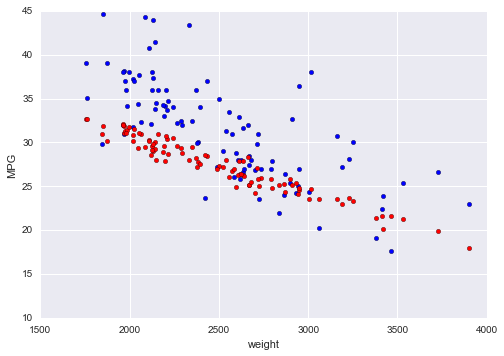

In [112]:
feature = "weight"

plt.scatter(X_test[feature], y_test, c='b')
plt.scatter(X_test[feature], prediction, c='r')

plt.ylim([10,45])
plt.xlim([1500,4000])
plt.ylabel('MPG')
plt.xlabel(feature)
plt.show()